In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
num_points = 100
x = np.linspace(0, num_points, num_points)

In [4]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

In [12]:
probs = [0.1, 0.2, 0.3, 0.4]
y = softmax(np.array([0.1] * 25 + [0.2] * 25 + [0.3] * 25 + [0.4] * 25))

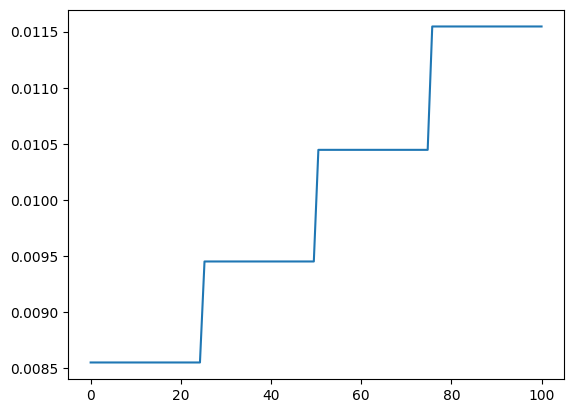

In [14]:
plt.plot(x, y)

In [19]:
import numpy as np

def assign_color_space(num_colors, percs):
  """
  Assigns space to each color based on given percentages.

  Args:
      num_colors: Number of colors in the gradient.
      percs: List of percentages for each color (length can be different from num_colors).

  Returns:
      A numpy array with the desired space allocation for each color.
  """
  # Apply softmax for normalization in case the sum of percs isn't 1.
  percs = np.array(percs)
  percs = percs / np.sum(percs)

  # Ensure percs length is at most num_colors and pad with zeros if needed.
  percs = np.pad(percs, (0, num_colors - len(percs)), mode='constant')

  # Calculate normalized space proportions for each color.
  color_spaces = percs

  # Check if the sum of percents is an integer divisor of the number of colors.
  if np.sum(percs) % 1 == 0:
    counts = np.round(color_spaces * num_colors).astype(int)
  else:
    # Calculate remainder and distribute it equally among all colors except the last.
    remainder = np.mod(np.sum(percs), 1)
    additional_counts = np.floor(remainder / (num_colors - 1))

    # Calculate base counts without the remainder distribution.
    base_counts = np.round(color_spaces * num_colors).astype(int)

    # Combine base counts with additional counts and handle the last color.
    counts = base_counts + additional_counts
    counts[-1] += remainder - np.sum(additional_counts)

  # Handle potential rounding errors to ensure sum equals num_colors.
  error = num_colors - np.sum(counts)
  if error != 0:
    counts[np.argmax(counts)] += error

  return counts

# Example usage
num_colors = 50
percs = [1, 0.5]
counts = assign_color_space(num_colors, percs)
print(counts)  # Output: [25 25]

# Generate an array with 25 elements of 1 and 25 of 0.5
array = np.concatenate([np.ones(counts[0]), np.full(counts[1], 0.5)])
print(array)


[33 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0]
[1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


In [44]:
import numpy as np

def distribute_colors(num_colors, percs, heights):
    
    percs = softmax(percs)
    heights = softmax(heights)
    
    # Step 2: Convert percentages to counts
    counts = (percs * num_colors).astype(int)
    
    # Step 3: Distribute colors
    colors = []
    for idx, count in enumerate(counts):
        colors.extend([heights[idx]] * count)
    
    # Ensure the correct total number of colors
    while len(colors) < num_colors:
        colors.append(colors[-1])  # Extend the last color to meet the target count
    # Step 1: Normalize percentages
    colors = softmax(colors)
    return colors

# Example usage:
num_colors = 100
percs = np.array([0.25, 0.25, 0.25, 0.25])
heights = np.array([0, 0.5, 0.75, 1])
result = distribute_colors(num_colors, percs, heights)
print(result)


[0.00886996 0.00886996 0.00886996 0.00886996 0.00886996 0.00886996
 0.00886996 0.00886996 0.00886996 0.00886996 0.00886996 0.00886996
 0.00886996 0.00886996 0.00886996 0.00886996 0.00886996 0.00886996
 0.00886996 0.00886996 0.00886996 0.00886996 0.00886996 0.00886996
 0.00886996 0.00967312 0.00967312 0.00967312 0.00967312 0.00967312
 0.00967312 0.00967312 0.00967312 0.00967312 0.00967312 0.00967312
 0.00967312 0.00967312 0.00967312 0.00967312 0.00967312 0.00967312
 0.00967312 0.00967312 0.00967312 0.00967312 0.00967312 0.00967312
 0.00967312 0.00967312 0.01029771 0.01029771 0.01029771 0.01029771
 0.01029771 0.01029771 0.01029771 0.01029771 0.01029771 0.01029771
 0.01029771 0.01029771 0.01029771 0.01029771 0.01029771 0.01029771
 0.01029771 0.01029771 0.01029771 0.01029771 0.01029771 0.01029771
 0.01029771 0.01029771 0.01029771 0.0111592  0.0111592  0.0111592
 0.0111592  0.0111592  0.0111592  0.0111592  0.0111592  0.0111592
 0.0111592  0.0111592  0.0111592  0.0111592  0.0111592  0.011159

In [45]:
sum(result)

0.9999999999999978

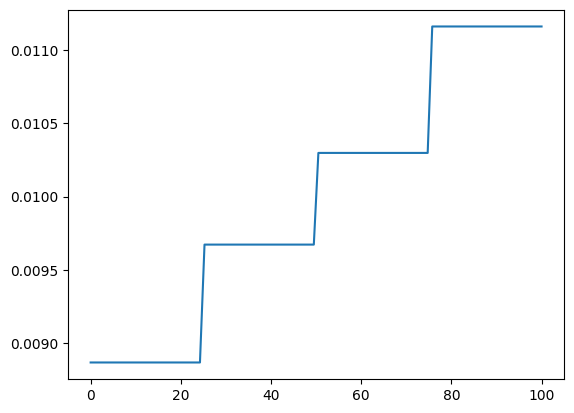

In [46]:
plt.plot(x, result)
# plt.yticks(heights)

In [26]:
softmax(result)

array([0.01141308, 0.01141308, 0.01141308, 0.01141308, 0.01141308,
       0.01141308, 0.01141308, 0.01141308, 0.01141308, 0.01141308,
       0.01141308, 0.01141308, 0.01141308, 0.01141308, 0.01141308,
       0.01141308, 0.01141308, 0.01141308, 0.01141308, 0.01141308,
       0.01141308, 0.01141308, 0.01141308, 0.01141308, 0.01141308,
       0.01141308, 0.01141308, 0.01141308, 0.01141308, 0.01141308,
       0.01141308, 0.01141308, 0.01141308, 0.01141308, 0.01141308,
       0.01141308, 0.01141308, 0.01141308, 0.01141308, 0.01141308,
       0.01141308, 0.01141308, 0.01141308, 0.01141308, 0.01141308,
       0.01141308, 0.01141308, 0.01141308, 0.01141308, 0.01141308,
       0.01141308, 0.01141308, 0.01141308, 0.01141308, 0.01141308,
       0.01141308, 0.01141308, 0.01141308, 0.01141308, 0.01141308,
       0.01141308, 0.01141308, 0.01141308, 0.01141308, 0.01141308,
       0.01141308, 0.01141308, 0.01141308, 0.01141308, 0.01141308,
       0.00692239, 0.00692239, 0.00692239, 0.00692239, 0.00692

In [14]:
1/9

0.1111111111111111

In [12]:
softmax([0.5, 0.4, 0.4, 0.4, 0.4, 0.3, 0.2, 0.1])[::-1]

array([0.0978681 , 0.10816098, 0.11953637, 0.13210812, 0.13210812,
       0.13210812, 0.13210812, 0.14600205])

In [1]:
[
    (0, 0, 0),
    (1, 0, 21),
    (9, 3, 73),
    (7, 40, 121),
    (27, 34, 100),
    (48, 29, 125),
    (116, 8, 70),
    (161, 0, 42),
    (240, 21, 1),
    (255, 95, 1),
][::-1]

[(255, 95, 1),
 (240, 21, 1),
 (161, 0, 42),
 (116, 8, 70),
 (48, 29, 125),
 (27, 34, 100),
 (7, 40, 121),
 (9, 3, 73),
 (1, 0, 21),
 (0, 0, 0)]